# Veri Sıkıştırma 2017 Güz Dönemi 1. Ödev <br> Mustafa Keskin 16501035

In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os.path import isfile, join
import os
from PIL import Image 
from itertools import groupby


# Girdi olarak rgb resim path'i veriliyor her bir rgb resim için grayscale, grayscale4bit, siyahbeyaz çevrimi yapılıyor.

In [2]:
def conversion(path):
    
    col = Image.open(path)
    filePath = path
    fileName = path.replace(' ', '')[:-4]

    # converting to grayscale
    gray_scale = col.convert("L")
    gray_scale.save(fileName + '_gray.bmp')
    # on a seperate object converting and saving 16 color grayscale
    gray_scale4 = gray_scale.point(lambda x: int(x / 17) * 17)
    gray_scale4.save(fileName + '_gray4.bmp')
    gray_read = cv2.imread(fileName + '_gray4.bmp', cv2.IMREAD_GRAYSCALE)

    # conversion and saving of BW image
    im_grayscale = cv2.imread(filePath,0)
    (thresh, im_bw) = cv2.threshold(im_grayscale, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    cv2.imwrite(fileName + '_bw.bmp',im_bw)


In [3]:
os.chdir("C:\\Users\\Mustafa\\testresim")
print os.getcwd()
dir = "C:\\Users\\Mustafa\\testresim"
paths = os.listdir(dir)

for path in paths:
    if(path.find("_") != -1):
        os.remove(path)

C:\Users\Mustafa\testresim


In [4]:
paths = os.listdir(dir)
print paths
for path in paths:
    conversion(path)

['biber.bmp', 'ev.bmp', 'lenna.bmp']


# Veri okunup görselleştiriliyor.

C:\Users\Mustafa\testresim\biber.bmp
C:\Users\Mustafa\testresim\biber_bw.bmp
C:\Users\Mustafa\testresim\biber_gray.bmp
C:\Users\Mustafa\testresim\biber_gray4.bmp
C:\Users\Mustafa\testresim\ev.bmp
C:\Users\Mustafa\testresim\ev_bw.bmp
C:\Users\Mustafa\testresim\ev_gray.bmp
C:\Users\Mustafa\testresim\ev_gray4.bmp
C:\Users\Mustafa\testresim\lenna.bmp
C:\Users\Mustafa\testresim\lenna_bw.bmp
C:\Users\Mustafa\testresim\lenna_gray.bmp
C:\Users\Mustafa\testresim\lenna_gray4.bmp


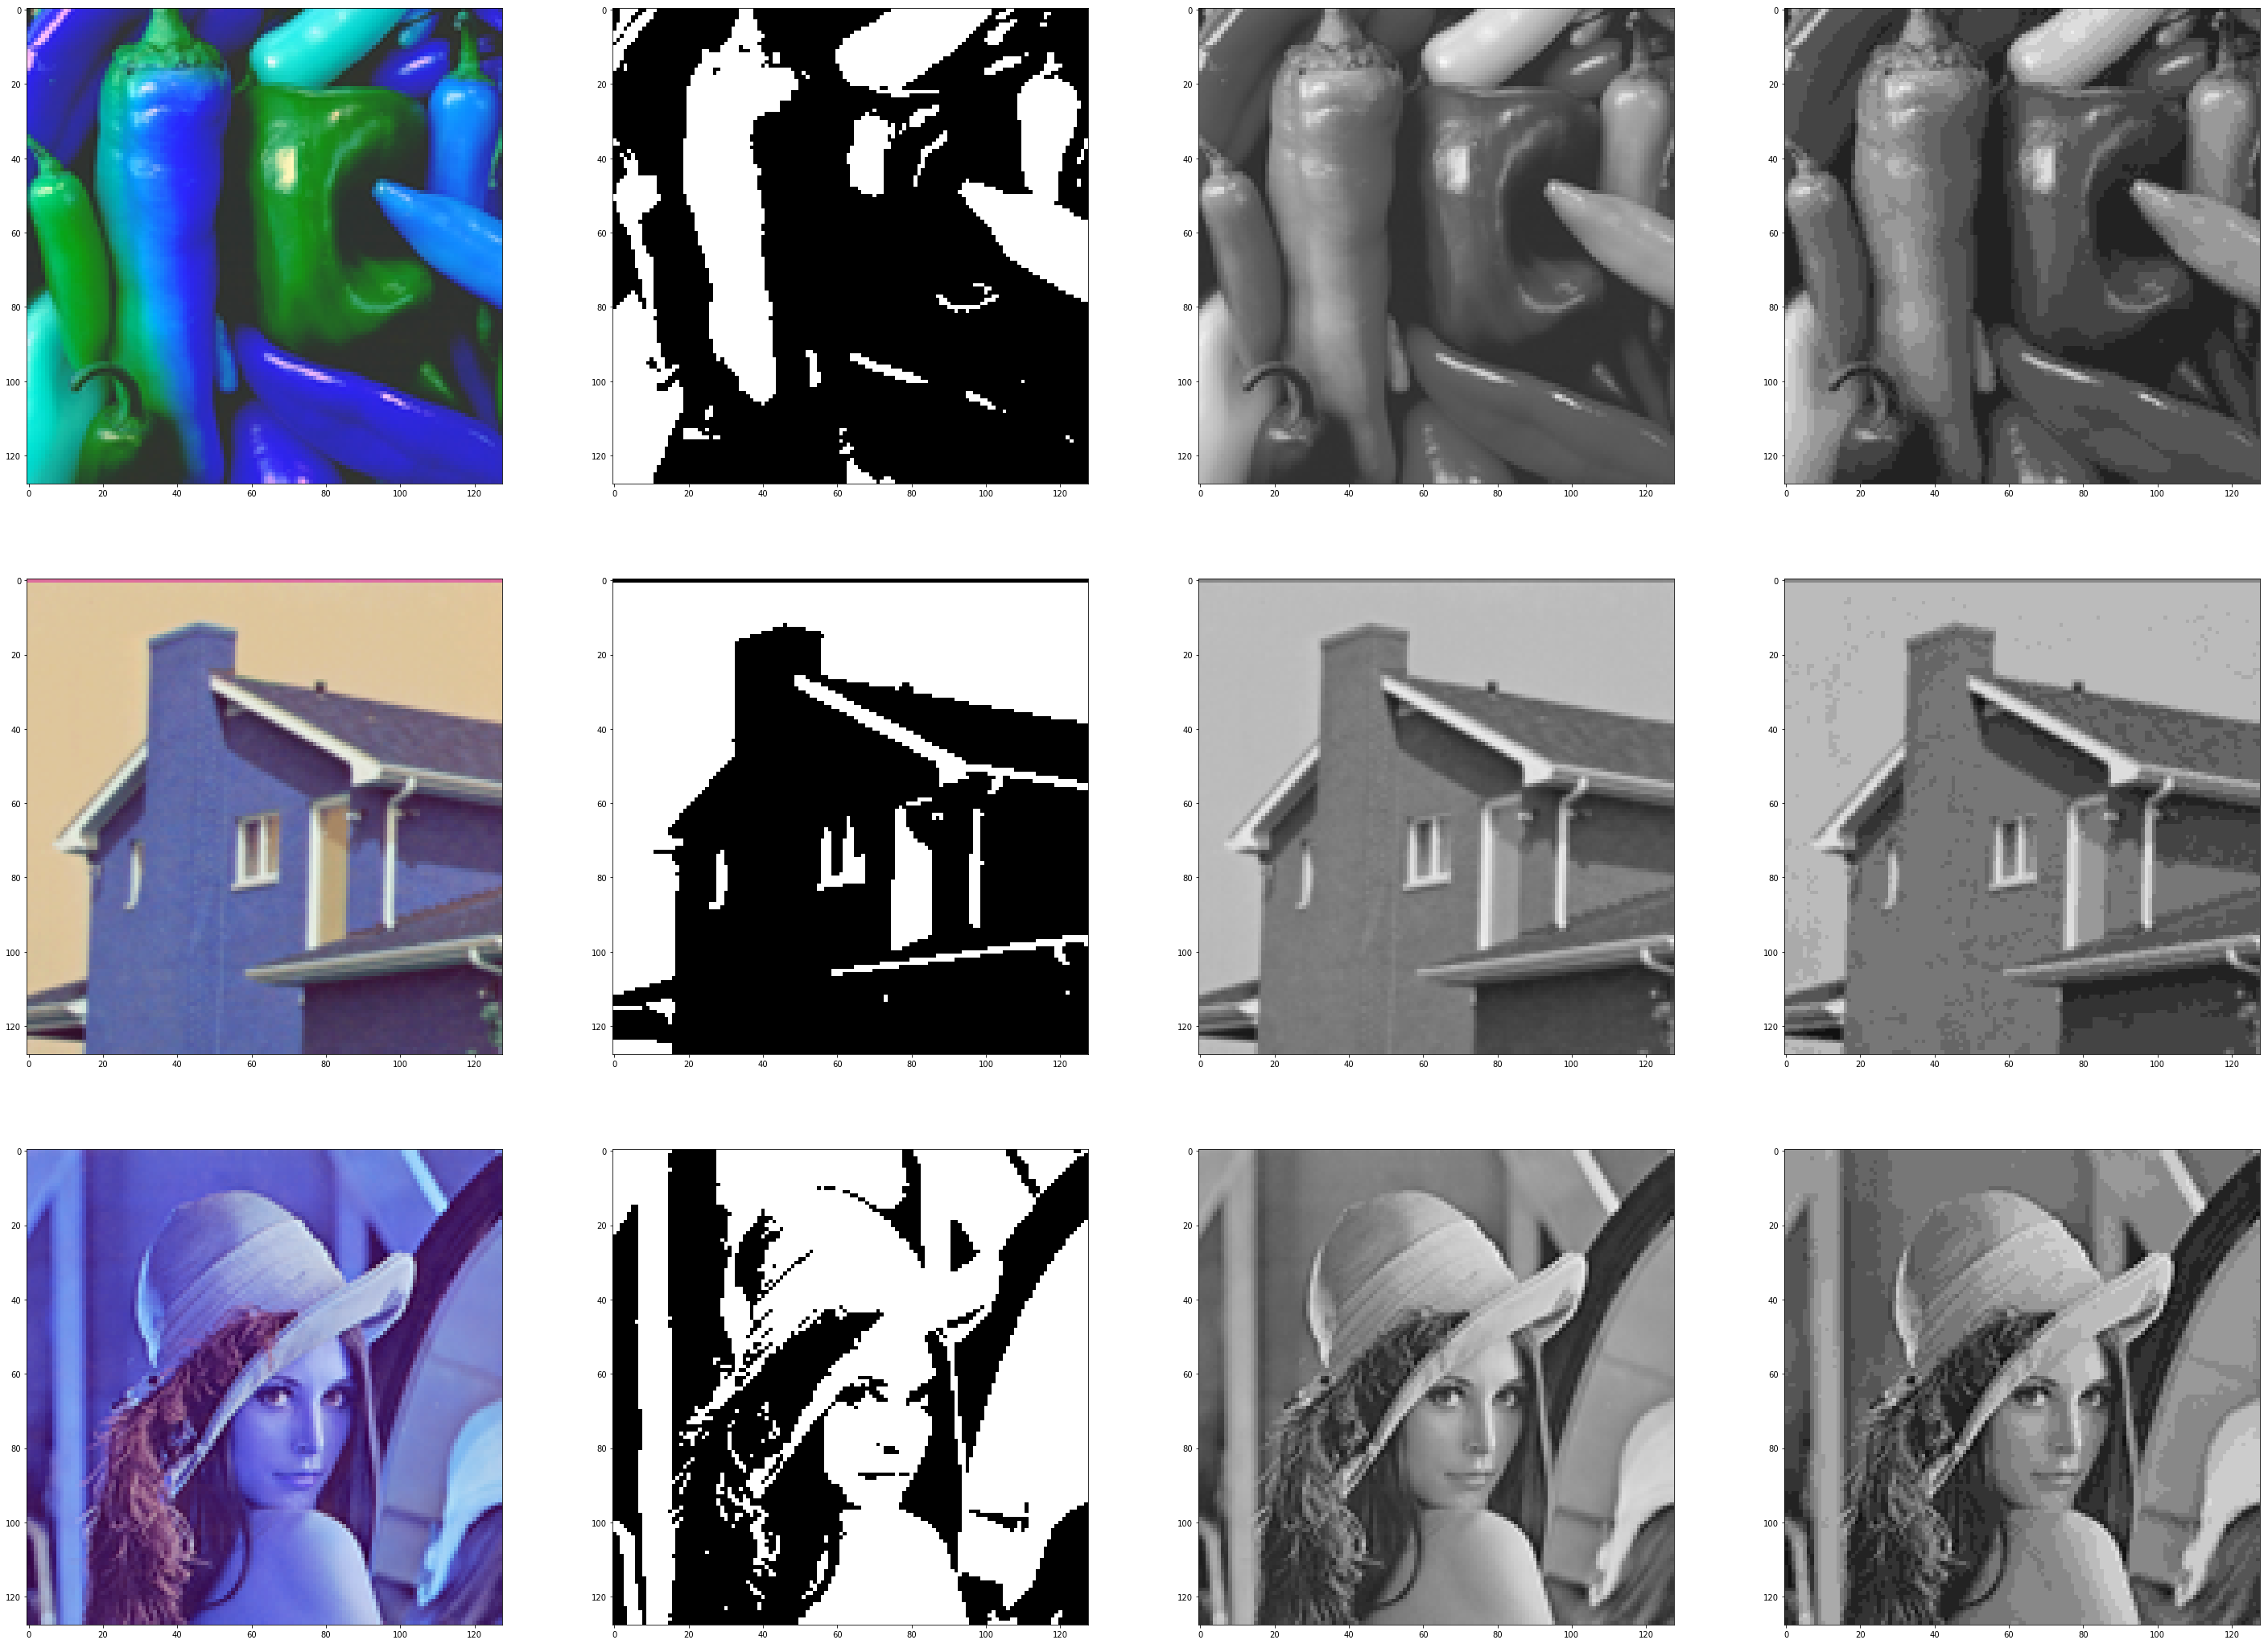

In [5]:
images = []
all_path = []
dir = "C:\\Users\\Mustafa\\testresim"
paths = os.listdir(dir)

for path in paths:
    full_path = join(dir, path)
    all_path.append(full_path)
    image = cv2.imread(full_path)
    images.append(image)
    print full_path

plt.figure(figsize =(50,50))
columns = 4

for i,image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

# Satır satır gezme

In [6]:
def row2row(I):
    vektor = []
    rows, cols = I.shape
    # matrix2vector
    for i in range(rows):
        if i % 2 == 0:
            for j in range(cols):
                vektor.append(I[i,j])
        else:
            for j in range(cols - 1, -1 , -1):
                vektor.append(I[i,j])
    return vektor

In [7]:
def row3row(I):
    vektor = []
    rows, cols = I.shape
    # matrix2vector
    for i in range(rows):
        if i % 2 == 0:
            for j in range(cols):
                vektor.append(i * rows + j)
        else:
            for j in range(cols - 1, -1 , -1):
                vektor.append(i * rows + j)
    return vektor

I2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
result = row3row(I2)
I3 = I2.ravel()
print I2
print I3
print I3[result]
print result

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]
[1 2 3 6 5 4 7 8 9]
[0L, 1L, 2L, 5L, 4L, 3L, 6L, 7L, 8L]


# Sütun sütun gezme

In [8]:
def col2col(I):
    vektor = []
    rows, cols = I.shape
    # matrix2vector
    for i in range(cols):
        if i % 2 == 0:
            for j in range(rows):
                vektor.append(I[j,i])
        else:
            for j in range(rows - 1, -1 , -1):
                vektor.append(I[j,i])

    return(vektor)            

In [9]:
def col3col(I):
    vektor = []
    rows, cols = I.shape
    # matrix2vector
    for i in range(cols):
        if i % 2 == 0:
            for j in range(rows):
                vektor.append(j * rows + i)
        else:
            for j in range(rows - 1, -1 , -1):
                vektor.append(j * rows + i)

    return(vektor)        

I2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
result = col3col(I2)
I3 = I2.ravel()
print I2
print I3
print I3[result]
print result

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]
[1 4 7 8 5 2 3 6 9]
[0L, 3L, 6L, 7L, 4L, 1L, 2L, 5L, 8L]


# Zigzag Gezme
(0, 0 dan başla)

Üst üçgen matris için,
1. Sağa bir kere git
2. Sol alta kadar git
3. Bir kere aşağı git
4. Sağ üste kadar git. 

Alt üçgen matris için,
1. Bir kere sağa git
2. Sağ üste kadar git
3. Bir kere aşağı git
4. Sol aşağı git. 

a11 a12 a13 a14 <br>
a21 a22 a23 a24 <br>
a31 a32 a33 a34 <br>
a41 a42 a43 a44 <br>

Output:
a11 a12 a21 a31 a22 a13 a14 a23 a32 a41 a42 a33 a24 a34 a43 a44.

In [10]:
def zig2zag(I):
    rows, cols = I.shape
    vektor = []
    # matrix2vector

    siz = rows
    for z in range(siz):
        x = 0
        y = z
        while(x <= z and y >=0):
            if(z % 2 == 0):
                vektor.append(I[y, x])
                y = y - 1
                x = x + 1
            else:
                vektor.append(I[x, y])
                x = x + 1
                y = y - 1


    for z in range(1,siz):
        x = z
        y = siz - 1
        while(x < siz and y >= z):
            if((siz + z) % 2 == 0):
                vektor.append(I[x, y])
                x = x + 1
                y = y - 1
            else:
                vektor.append(I[y, x])
                y = y - 1
                x = x + 1

    return vektor

In [11]:
def zig3zag(I):
    rows, cols = I.shape
    vektor = []
    # matrix2vector

    siz = rows
    for z in range(siz):
        x = 0
        y = z
        while(x <= z and y >=0):
            if(z % 2 == 0):
                vektor.append(y * rows + x)
                y = y - 1
                x = x + 1
            else:
                vektor.append(x * rows + y)
                x = x + 1
                y = y - 1


    for z in range(1,siz):
        x = z
        y = siz - 1
        while(x < siz and y >= z):
            if((siz + z) % 2 == 0):
                vektor.append(x * rows + y)
                x = x + 1
                y = y - 1
            else:
                vektor.append(y * rows + x)
                y = y - 1
                x = x + 1

    return vektor


I2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
result = zig3zag(I2)
I3 = I2.ravel()
print I2
print I3
print I3[result]
print result

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]
[1 2 4 7 5 3 6 8 9]
[0L, 1L, 3L, 6L, 4L, 2L, 5L, 7L, 8L]


In [24]:
I = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
I3 = I.ravel()
print I.shape

result_satir2 = np.array(row2row(I))
result_sutun2 = np.array(col2col(I))
result_zigzag2 = np.array(zig2zag(I))


result_satir3 = np.array(row3row(I))
result_sutun3 = np.array(col3col(I))
result_zigzag3 = np.array(zig3zag(I))

print I
print "\n"
print result_satir2
print result_satir3
print np.reshape(result_satir2[result_satir3], (3,-1))
for i in range(len(result_satir2)):
    index = result_satir3[i]
    value =  result_satir2[i]
    I3[index] = value
    
print I3

print "\n"
print result_sutun2
print result_sutun3
print np.reshape(result_sutun2[result_sutun3], (3,-1))
for i in range(len(result_satir2)):
    index = result_sutun3[i]
    value =  result_sutun2[i]
    I3[index] = value
    
print I3   




print "\n"
print result_zigzag2
print result_zigzag3
print np.reshape(result_zigzag2[result_zigzag3], (3,-1)) 
for i in range(len(result_satir2)):
    index = result_zigzag3[i]
    value =  result_zigzag2[i]
    I3[index] = value
    
print I3   

(3L, 3L)
[[10 20 30]
 [40 50 60]
 [70 80 90]]


[10 20 30 60 50 40 70 80 90]
[0 1 2 5 4 3 6 7 8]
[[10 20 30]
 [40 50 60]
 [70 80 90]]
[10 20 30 40 50 60 70 80 90]


[10 40 70 80 50 20 30 60 90]
[0 3 6 7 4 1 2 5 8]
[[10 80 30]
 [60 50 40]
 [70 20 90]]
[10 20 30 40 50 60 70 80 90]


[10 20 40 70 50 30 60 80 90]
[0 1 3 6 4 2 5 7 8]
[[10 20 70]
 [60 50 40]
 [30 80 90]]
[10 20 30 40 50 60 70 80 90]


# Example of RLE

In [14]:
def encode(vektor):
    return [(sum(1 for _ in g), k) for k,g in groupby(vektor)]

In [15]:
I = images[0][:,:,0]
satir3 = row3row(I)
sutun3 = col3col(I)
zigzag3 = zig3zag(I)

for i in range(len(images)):
    if i % 4 == 0:
        for j in range(3):
            I = images[i][:,:,j]
            satir = row2row(I)
            sutun = col2col(I)
            zigzag = zig2zag(I)

            encode_satir = encode(satir)
            encode_sutun =  encode(sutun)
            encode_zigzag =  encode(zigzag)

            filename = all_path[i].replace(' ', '')[:-4]           
            np.savetxt(filename + "_" + str(j) + "_satir.txt",  encode_satir,  fmt='%d', newline='\n')
            np.savetxt(filename + "_" + str(j) + "_sutun.txt",  encode_sutun,  fmt='%d', newline='\n')
            np.savetxt(filename + "_" + str(j) + "_zigzag.txt", encode_zigzag, fmt='%d', newline='\n')
    else:
        I = images[i][:,:,0]
        satir = row2row(I)
        sutun = col2col(I)
        zigzag = zig2zag(I)

        encode_satir = encode(satir)
        encode_sutun =  encode(sutun)
        encode_zigzag =  encode(zigzag)

        filename = all_path[i].replace(' ', '')[:-4]           
        np.savetxt(filename + "_satir.txt",  encode_satir,  fmt='%d', newline='\n')
        np.savetxt(filename + "_sutun.txt",  encode_sutun,  fmt='%d', newline='\n')
        np.savetxt(filename + "_zigzag.txt", encode_zigzag, fmt='%d', newline='\n')
    
    

In [16]:
def txt2vector(filename):  
    compressed = np.loadtxt(filename)
    rows, cols = compressed.shape
    sonuc = []
    for i in range(rows):
        value = int(compressed[i,0])
        for j in range(value):
            sonuc.append(int(compressed[i,1]))
    
    return np.array(sonuc)

In [17]:
def donustur(indexs, values):
    
    I = np.zeros(len(indexs))
    for i in range(len(indexs)):
        index = indexs[i]
        value =  values[i]
        I[index] = value
    
    return I 

In [26]:
i = 2
j = 0
path_satir = all_path[i].replace(' ', '')[:-4]  + "_satir.txt"
path_sutun = all_path[i].replace(' ', '')[:-4]  + "_sutun.txt"
path_zigzag = all_path[i].replace(' ', '')[:-4]  + "_zigzag.txt"

print path_satir
print path_sutun
print path_zigzag
print all_path[i]

sonuc_satir = txt2vector(path_satir)
satirsatir = donustur(satir3, sonuc_satir)

sonuc_sutun = txt2vector(path_sutun)
sutunsutun = donustur(sutun3, sonuc_sutun)

sonuc_zigzag = txt2vector(path_zigzag)
zigzag = donustur(zigzag3, sonuc_zigzag)


I = cv2.imread(all_path[i],0)


C:\Users\Mustafa\testresim\biber_gray_satir.txt
C:\Users\Mustafa\testresim\biber_gray_sutun.txt
C:\Users\Mustafa\testresim\biber_gray_zigzag.txt
C:\Users\Mustafa\testresim\biber_gray.bmp


In [27]:
print I[:11, :10]
print satir[:10]
print sutun[:10]
print zigzag[:10]

print sonuc_satir
print sonuc_sutun
print sonuc_zigzag

[[ 42  93 173 165 135 146 143 111 114 158]
 [ 45 114 167 156 142 142 114 114 151 210]
 [ 49  66 146 142 145 115 108 122 191 210]
 [ 46  86 143 149 123 111 119 167 218 150]
 [ 60 123 153 129 112 127 188 219 163  96]
 [ 96 146 139 114 117 174 220 174  99  94]
 [133 151 120 118 172 215 193 108  94  95]
 [156 134 111 154 216 209 120  92  96  92]
 [146 113 149 214 212 149  95  96  93  92]
 [114 140 212 216 152  97  95  94  92  89]
 [160 164 139 120 100  95  95  92  89  87]]
[153, 153, 153, 153, 153, 153, 153, 153, 153, 153]
[153, 153, 153, 153, 153, 153, 153, 153, 153, 153]
[  42.   93.  173.  165.  135.  146.  143.  111.  114.  158.]
[ 42  93 173 ..., 170 178 182]
[42 45 49 ..., 92 90 78]
[42 93 45 ..., 85 82 83]


# Vector matrise dönüştürülüyor

In [28]:
satir_son =  np.reshape(satirsatir, (128,-1)) 
sutun_son =  np.reshape(sutunsutun, (128,-1)) 
zigzag_son = np.reshape(zigzag,     (128,-1)) 

# Girdi resim ile decompress edilmiş matrislerin ilk 3 satır ve sütunu ekrana bastırılıyor

In [29]:
print I[:3, :3]
print satir_son[:3, :3]
print sutun_son[:3, :3]
print zigzag_son[:3, :3]

[[ 42  93 173]
 [ 45 114 167]
 [ 49  66 146]]
[[  42.   93.  173.]
 [  45.  114.  167.]
 [  49.   66.  146.]]
[[  42.   93.  173.]
 [  45.  114.  167.]
 [  49.   66.  146.]]
[[  42.   93.  173.]
 [  45.  114.  167.]
 [  49.   66.  146.]]


# Girdi resim ile decompress edilmiş resim arasındaki farkların toplamı alınıyor.

In [30]:
print sum(sum(np.subtract(I, satir_son)))
print sum(sum(np.subtract(I, sutun_son)))
print sum(sum(np.subtract(I, zigzag_son)))

0.0
0.0
0.0


# Girdi resim ile decompress edilmiş resim görselleştiriliyor.

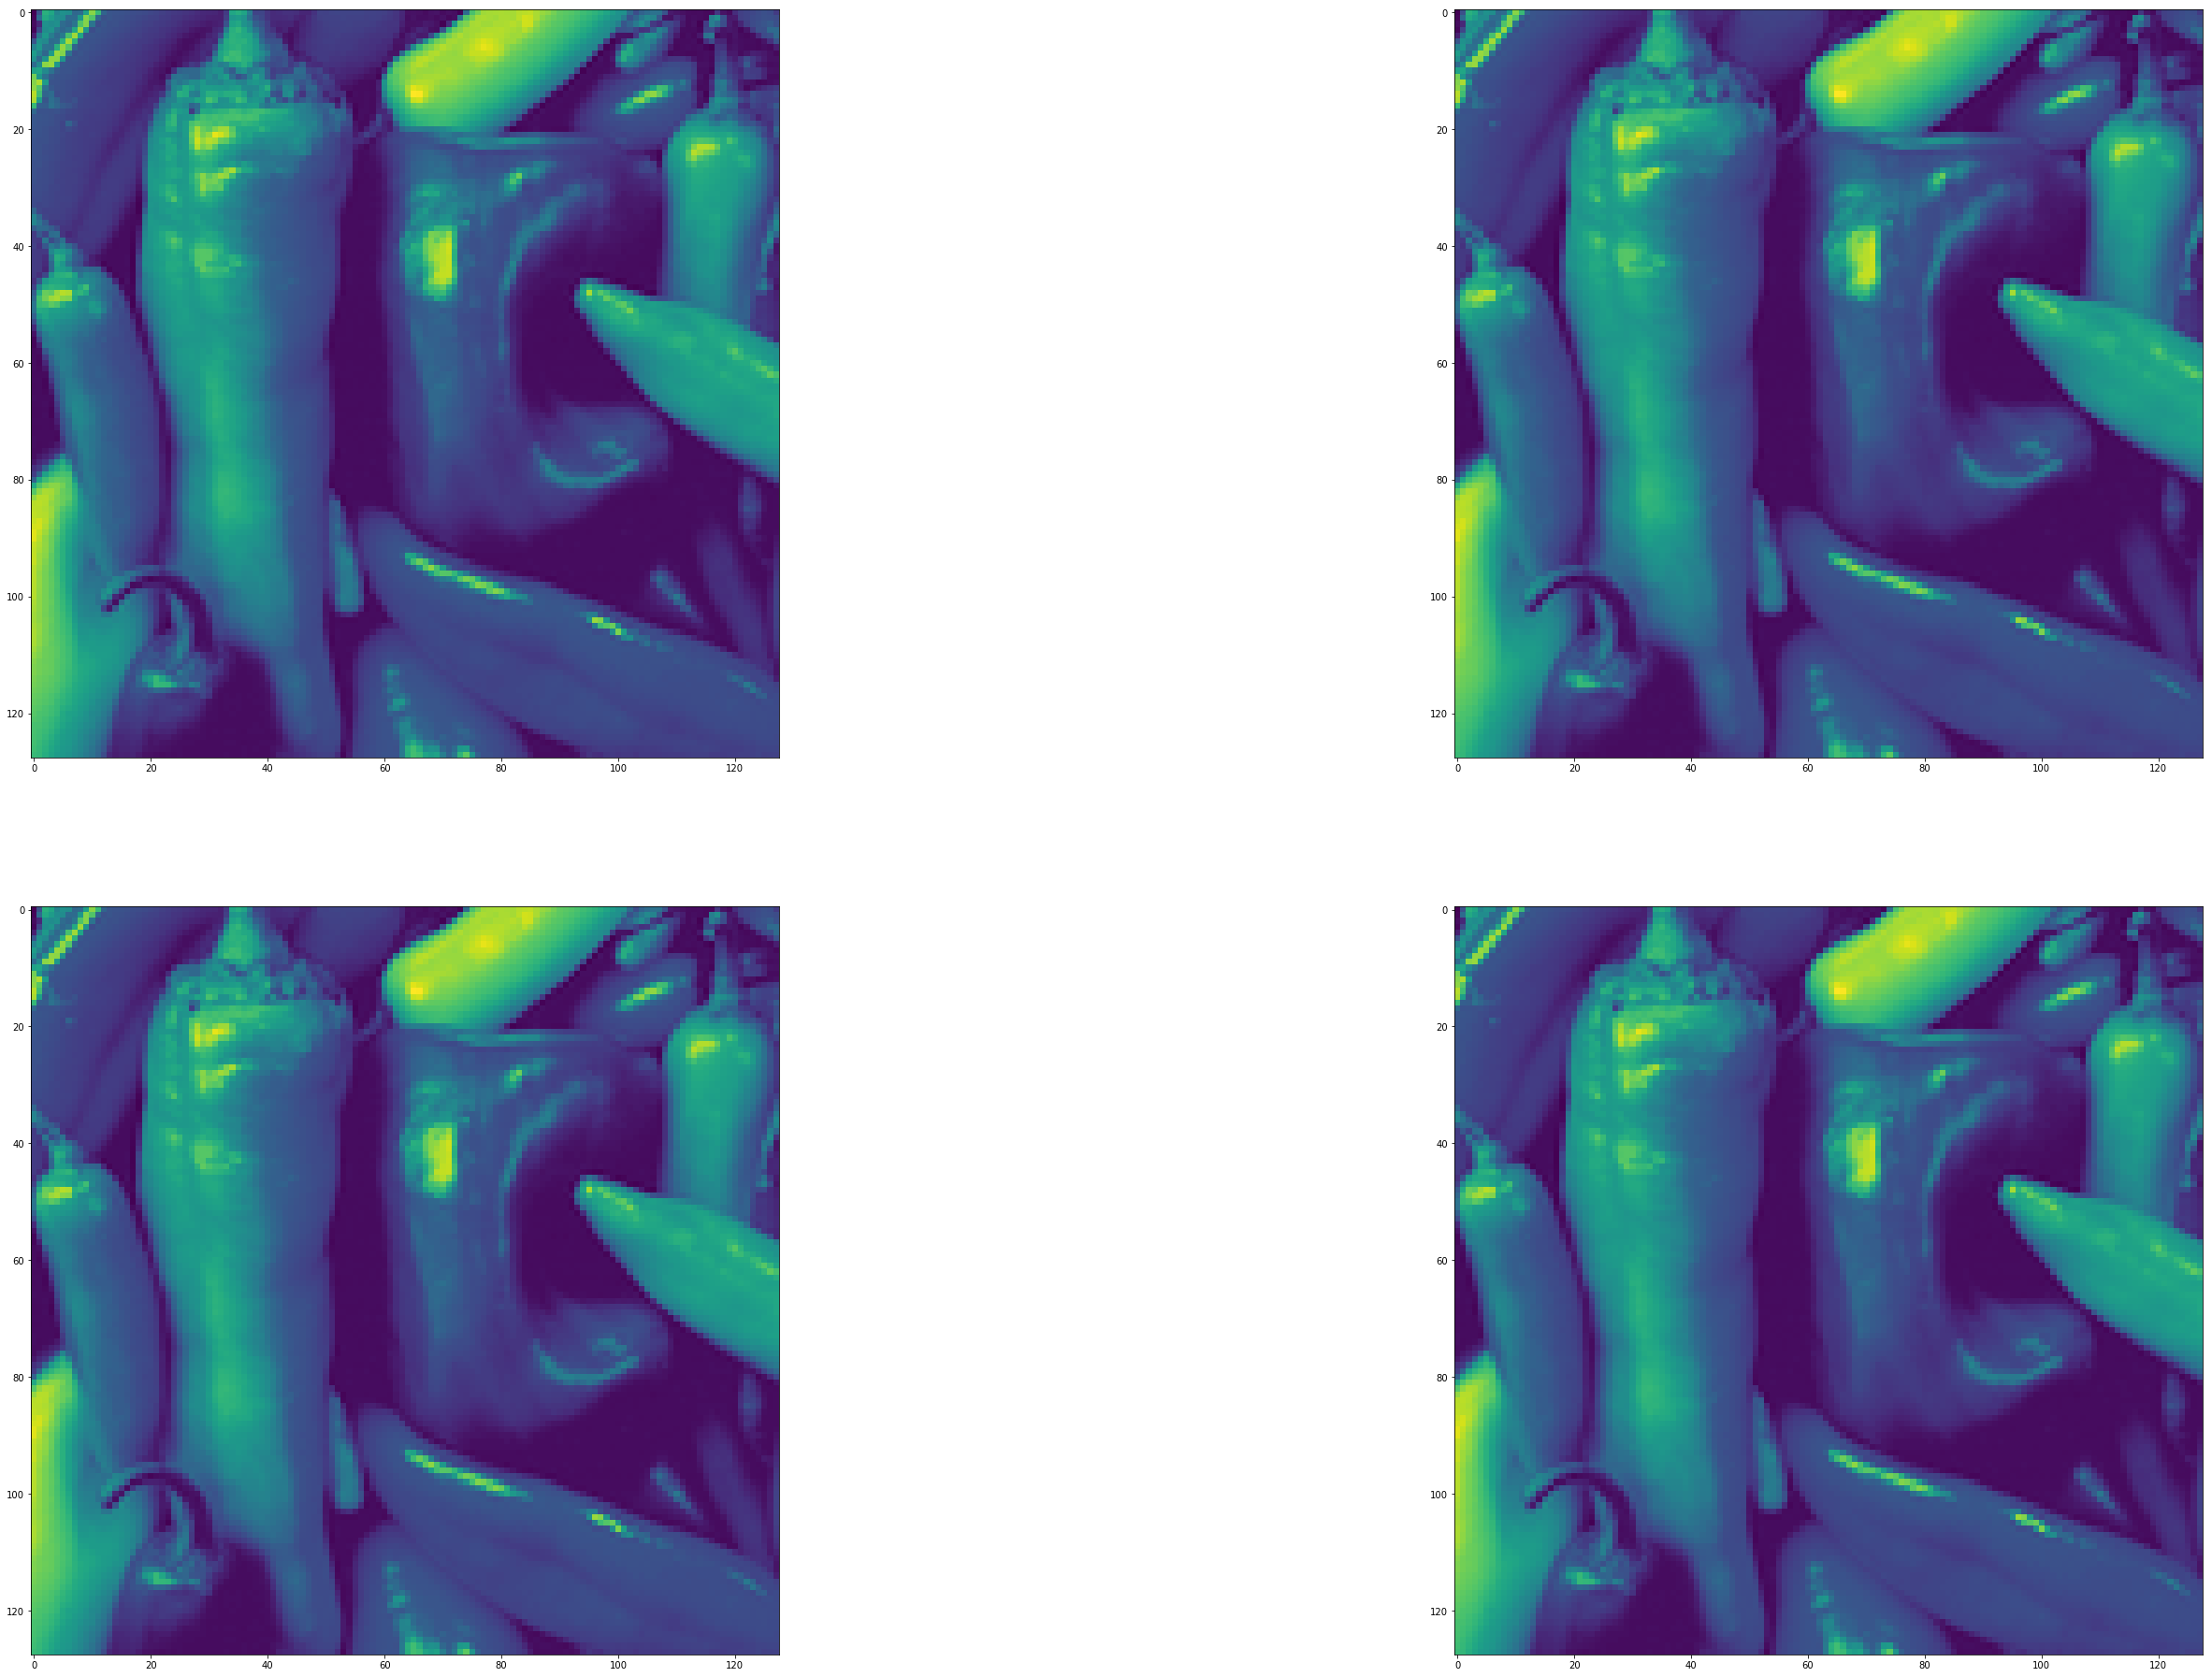

In [31]:
plt.figure(figsize =(50,50))
columns = 2
resimler = [I, satir_son, sutun_son, zigzag_son]
for i,image in enumerate(resimler):
    plt.subplot(len(resimler) / columns + 1, columns, i + 1)
    plt.imshow(image)